# Stock Market Analysis Project

I'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. Keep in mind that this project is mainly just to practice my skills with matplotlib, pandas, and numpy.

### Imports


In [3]:
import pandas as pd
import numpy as np 
import datetime
import pandas_datareader
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)
** Using pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.**

In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [5]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


### GM Stock (Ticker: GM on the NASDAQ)

In [8]:
GM = web.DataReader("GM", 'yahoo', start, end)

In [9]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


### Ford Stock (Ticker: Ford on the NASDAQ)

In [10]:
Ford = web.DataReader("F", 'yahoo', start, end)

In [11]:
Ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414


## Visualizing the Data


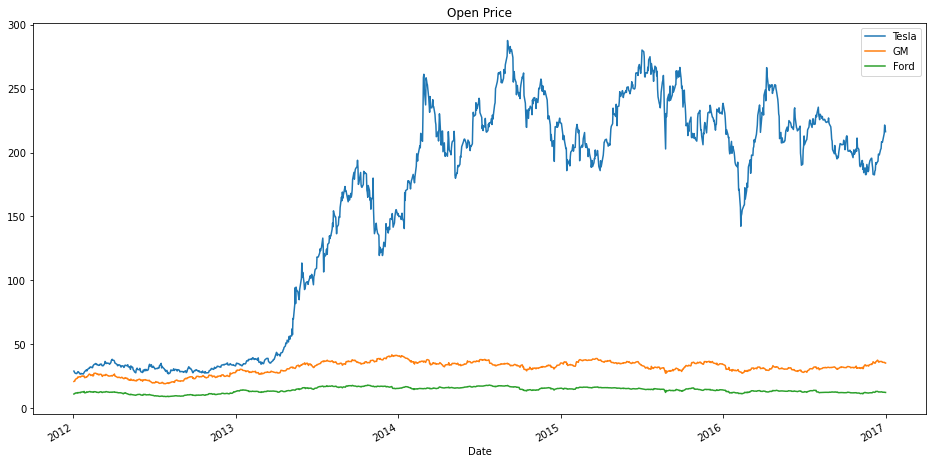

In [12]:
tesla['Open'].plot(label = 'Tesla',figsize = (16,8), title = "Open Price")
GM['Open'].plot(label = "GM")
Ford['Open'].plot(label = "Ford")
plt.legend()

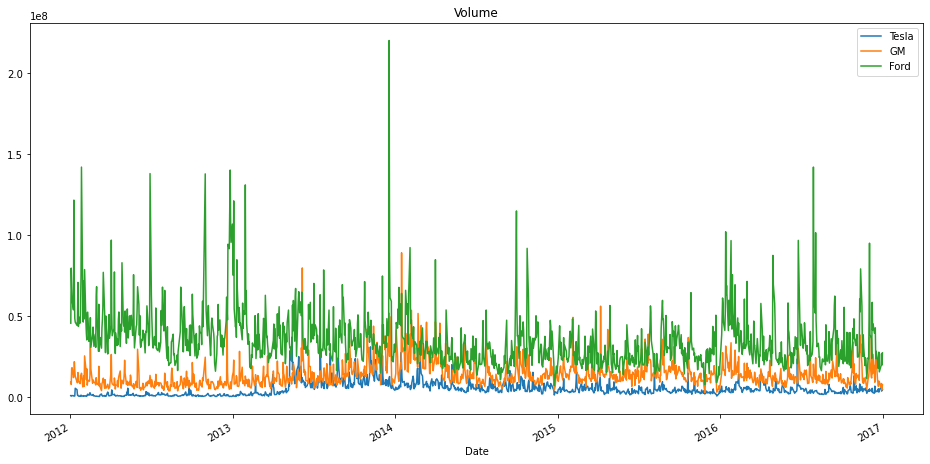

In [13]:
tesla['Volume'].plot(label = 'Tesla',figsize = (16,8), title = "Volume")
GM['Volume'].plot(label = "GM")
Ford['Volume'].plot(label = "Ford")
plt.legend()

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

In [14]:
Ford[Ford['Volume']==Ford['Volume'].max()]


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-18,16.0,15.17,15.99,15.65,220363000.0,11.044733


In [15]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
Ford['Total Traded'] = Ford['Open']*Ford['Volume']
GM['Total Traded'] = GM['Open']*GM['Volume']

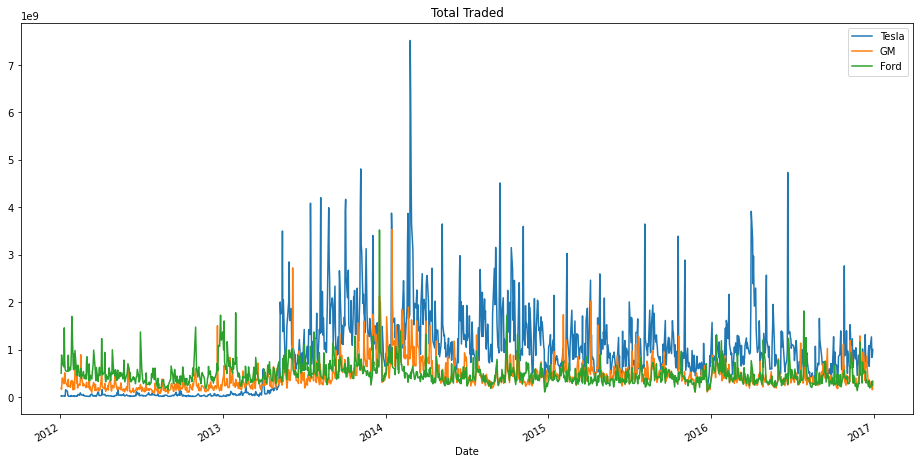

In [16]:
tesla['Total Traded'].plot(label = 'Tesla',figsize = (16,8), title = "Total Traded")
GM['Total Traded'].plot(label = "GM")
Ford['Total Traded'].plot(label = "Ford")
plt.legend()

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [18]:
tesla[tesla['Total Traded']==tesla['Total Traded'].max()]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2014-02-25,259.200012,228.449997,230.0,248.0,32681700,248.0,7.516791e+09


** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

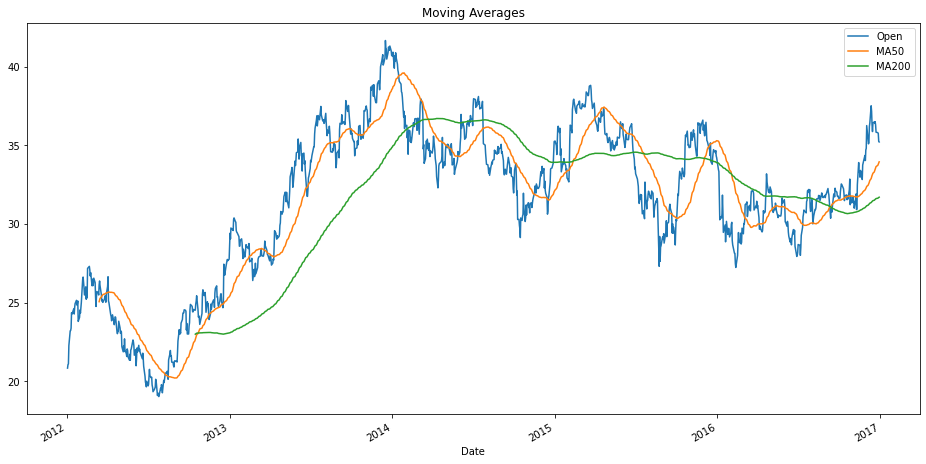

In [20]:
GM['MA50'] = GM['Open'].rolling(50).mean()
GM['MA200'] = GM['Open'].rolling(200).mean()
GM['Open'].plot(label = 'Open',figsize = (16,8), title = "Moving Averages")
GM['MA50'].plot(label = "MA50")
GM['MA200'].plot(label = "MA200")
plt.legend()

### Lets see if there is a relationship between these stocks, after all, they are all related to the car industry.

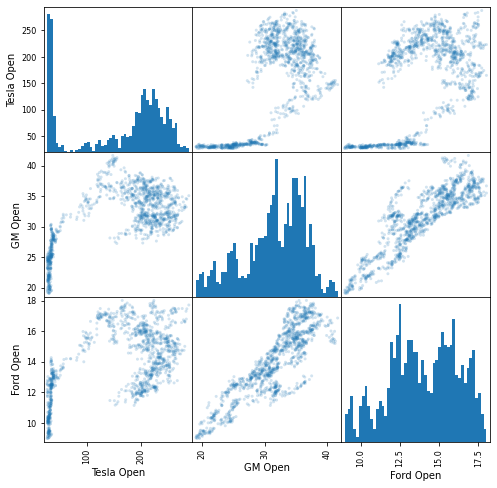

In [21]:
from pandas.plotting import scatter_matrix
car_comp = pd.concat([tesla['Open'],GM['Open'],Ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

# Basic Financial Analysis

## Daily Percentage Change

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [22]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [23]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [24]:
GM['returns'] = (GM['Close'] / GM['Close'].shift(1) ) - 1

In [25]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08,NaN,NaN,-0.003490


In [26]:
Ford['returns'] = (Ford['Close'] / Ford['Close'].shift(1) ) - 1

In [27]:
Ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414,6.386011e+08,0.007686


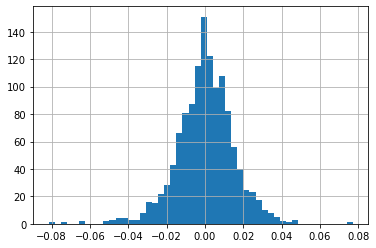

In [28]:
Ford['returns'].hist(bins=50)

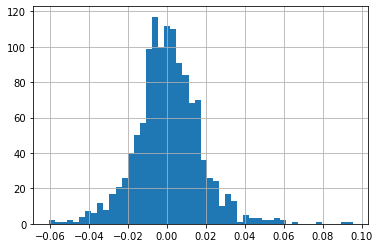

In [29]:
GM['returns'].hist(bins=50)

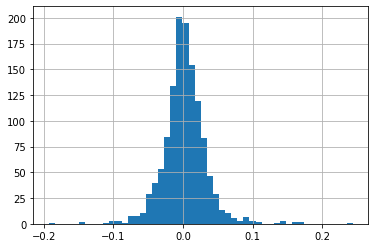

In [30]:
tesla['returns'].hist(bins=50)

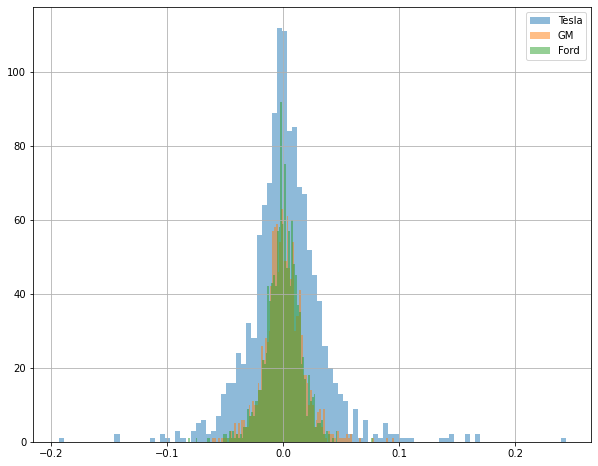

In [31]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
GM['returns'].hist(bins=100,label='GM',alpha=0.5)
Ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

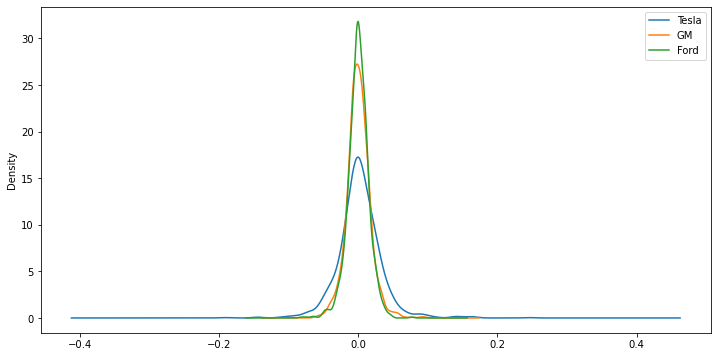

In [32]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
GM['returns'].plot(kind='kde',label='GM')
Ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

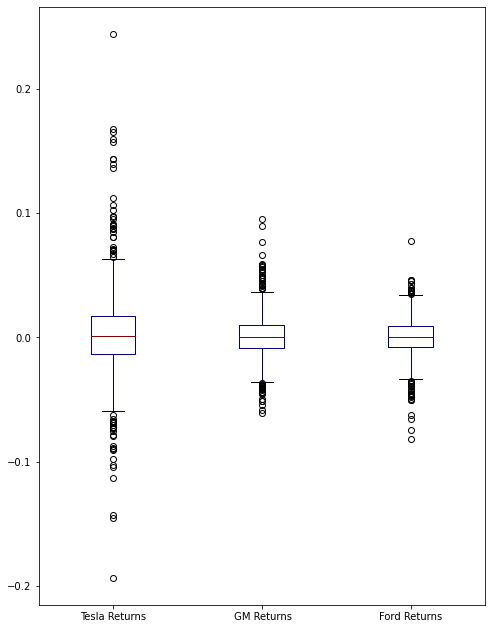

In [33]:
box_df = pd.concat([tesla['returns'],GM['returns'],Ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks


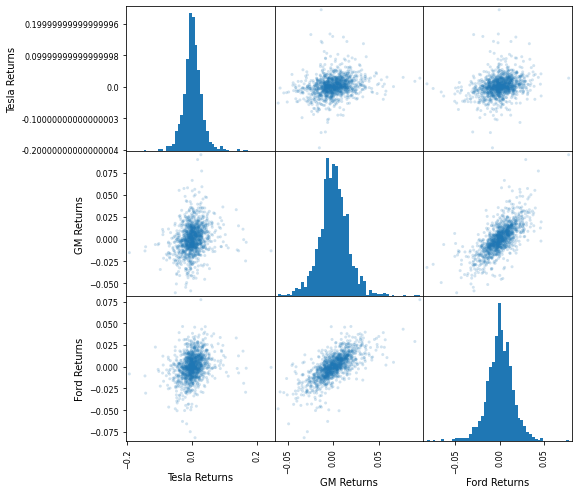

In [35]:
car_comp = pd.concat([tesla['returns'],GM['returns'],Ford['returns']],axis=1)
car_comp.columns = ['Tesla Returns','GM Returns','Ford Returns']
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

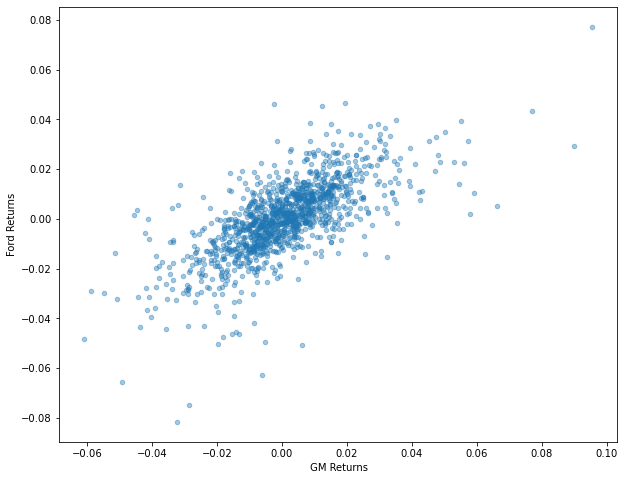

In [36]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

## Cumulative Daily Returns

In [37]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [38]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.970442


In [39]:
GM['Cumulative Return'] = (1 + GM['returns']).cumprod()
Ford['Cumulative Return'] = (1 + Ford['returns']).cumprod()

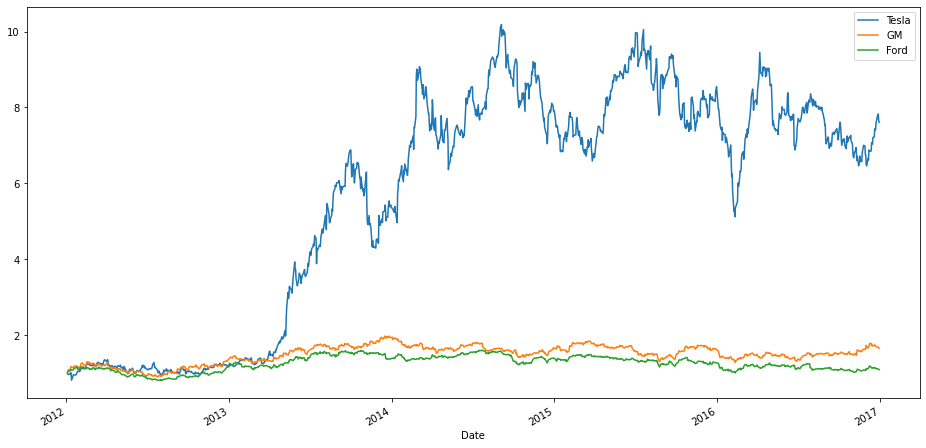

In [40]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
GM['Cumulative Return'].plot(label='GM')
Ford['Cumulative Return'].plot(label='Ford')
plt.legend()